In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions as fc
import importlib

importlib.reload(fc)

<module 'functions' from 'c:\\Users\\Sabrina\\Desktop\\TestDA\\Week_9\\Final_project\\notebooks\\functions.py'>

In [4]:
cleaned_video_games = pd.read_csv('..\data\cleaned\cleaned_video_games_df.csv')
cleaned_video_games

,Unnamed: 0,game_title,platform,year,genre,publisher,north_america,europe,japan,rest_of_world,global,review
0,0,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,FIFA Soccer World Championship,PS2,2000,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [5]:
rest_world_df = cleaned_video_games.copy().drop(columns=['japan', 'north_america', 'europe', 'global', 'Unnamed: 0'], axis=1)
display(rest_world_df.head(3))

,game_title,platform,year,genre,publisher,rest_of_world,review
0,Wii Sports,Wii,2006,Sports,Nintendo,8.54,76.28
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.77,91.00
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.21,82.07


In [6]:
rest_world_df_platform_sales = fc.df_grouping(rest_world_df, 'platform', 'rest_of_world')
rest_world_df_genre_sales = fc.df_grouping(rest_world_df, 'genre', 'rest_of_world')
rest_world_df_publisher_sales = fc.df_grouping(rest_world_df, 'publisher', 'rest_of_world')

display(rest_world_df_platform_sales.head(3))
display(rest_world_df_genre_sales.head(3))
display(rest_world_df_publisher_sales.head(3))

,year,platform,rest_of_world
0,2004,PS2,18.40
1,2002,PS2,16.86
2,2003,PS2,15.51


,year,genre,rest_of_world
0,2006,Sports,12.21
1,2009,Sports,9.60
2,2011,Shooter,8.75


,year,publisher,rest_of_world
0,2006,Nintendo,17.77
1,2009,Nintendo,9.85
2,2005,Nintendo,9.73


## Rest of the World Platform Analysis

In [7]:
#for a better readability in the lineplot, I'll be separating platforms by companies. 

sony_platform_df = rest_world_df_platform_sales.copy()
sony_platform_df = sony_platform_df[sony_platform_df['platform'].isin(['PS2', 'PS', 'PS3', 'PSP', 'PSV'])]


nintendo_platform_df = rest_world_df_platform_sales.copy()
nintendo_platform_df = nintendo_platform_df[nintendo_platform_df['platform'].isin(['NES', 'GB', 'SNES', 'N64', 'GBA', 'GC', 'DS', '3DS', 'Wii','WiiU'])]


sega_platforms_df = rest_world_df_platform_sales.copy()
sega_platforms_df = sega_platforms_df[sega_platforms_df['platform'].isin(['GEN', 'SCD', 'SAT', 'DC'])]


microsoft_platforms_df = rest_world_df_platform_sales.copy()
microsoft_platforms_df = microsoft_platforms_df[microsoft_platforms_df['platform'].isin(['XB', 'X360'])]

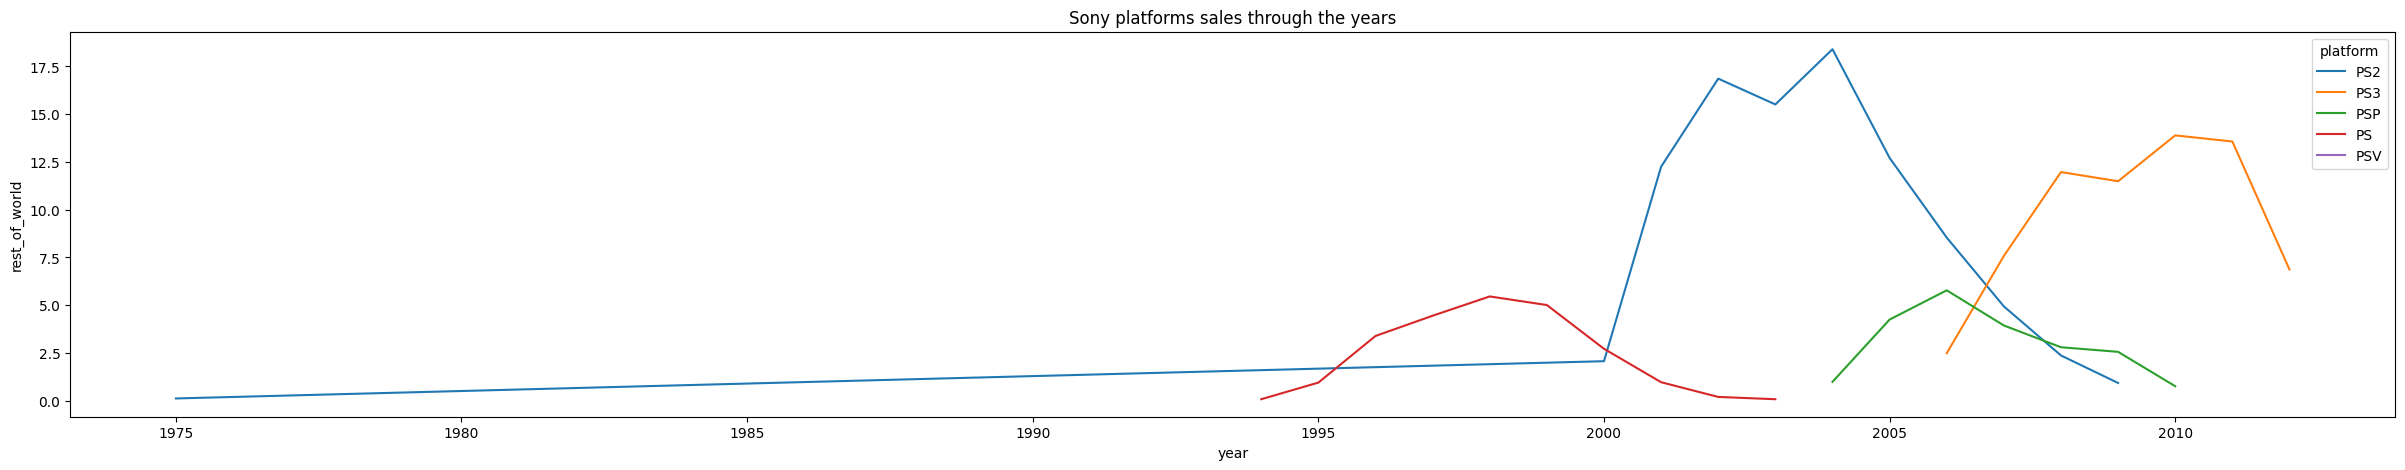

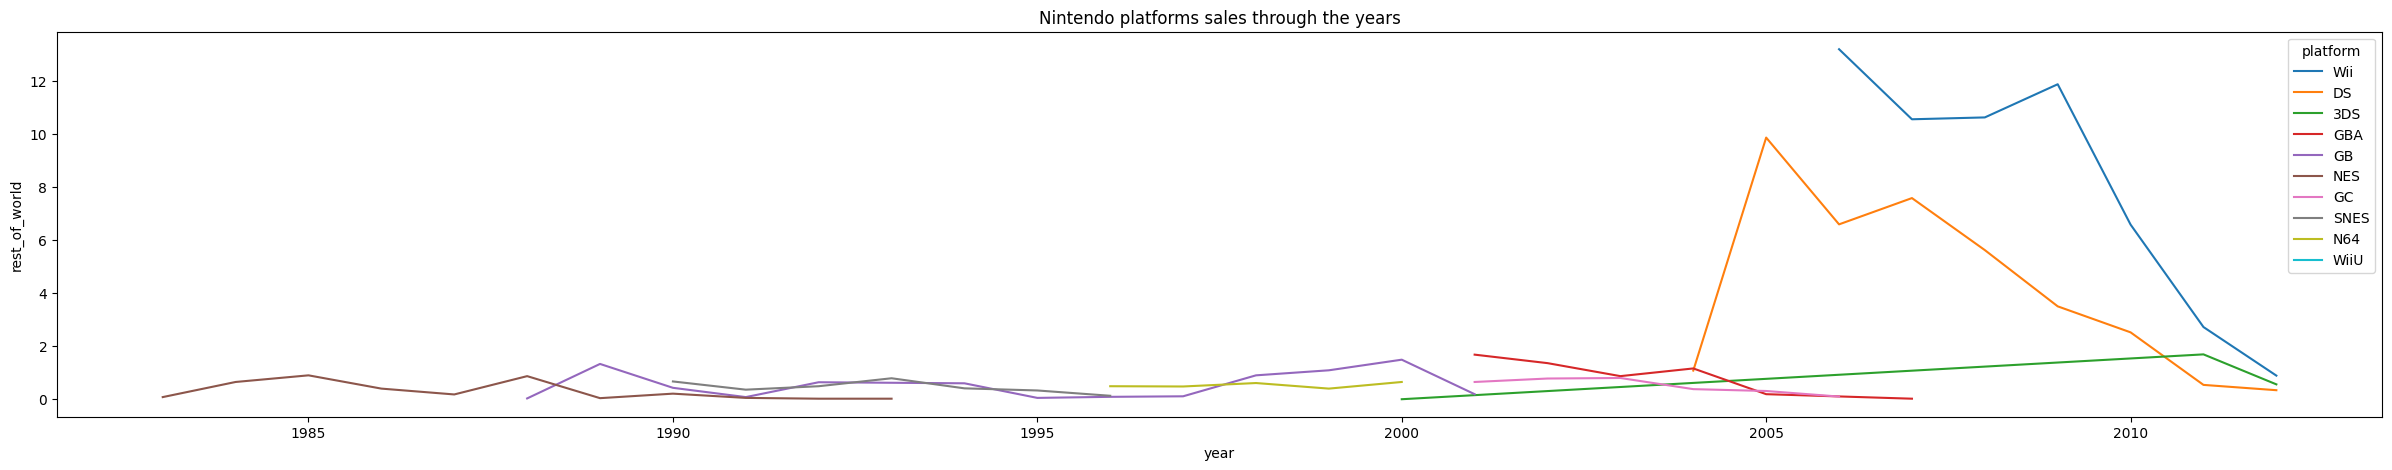

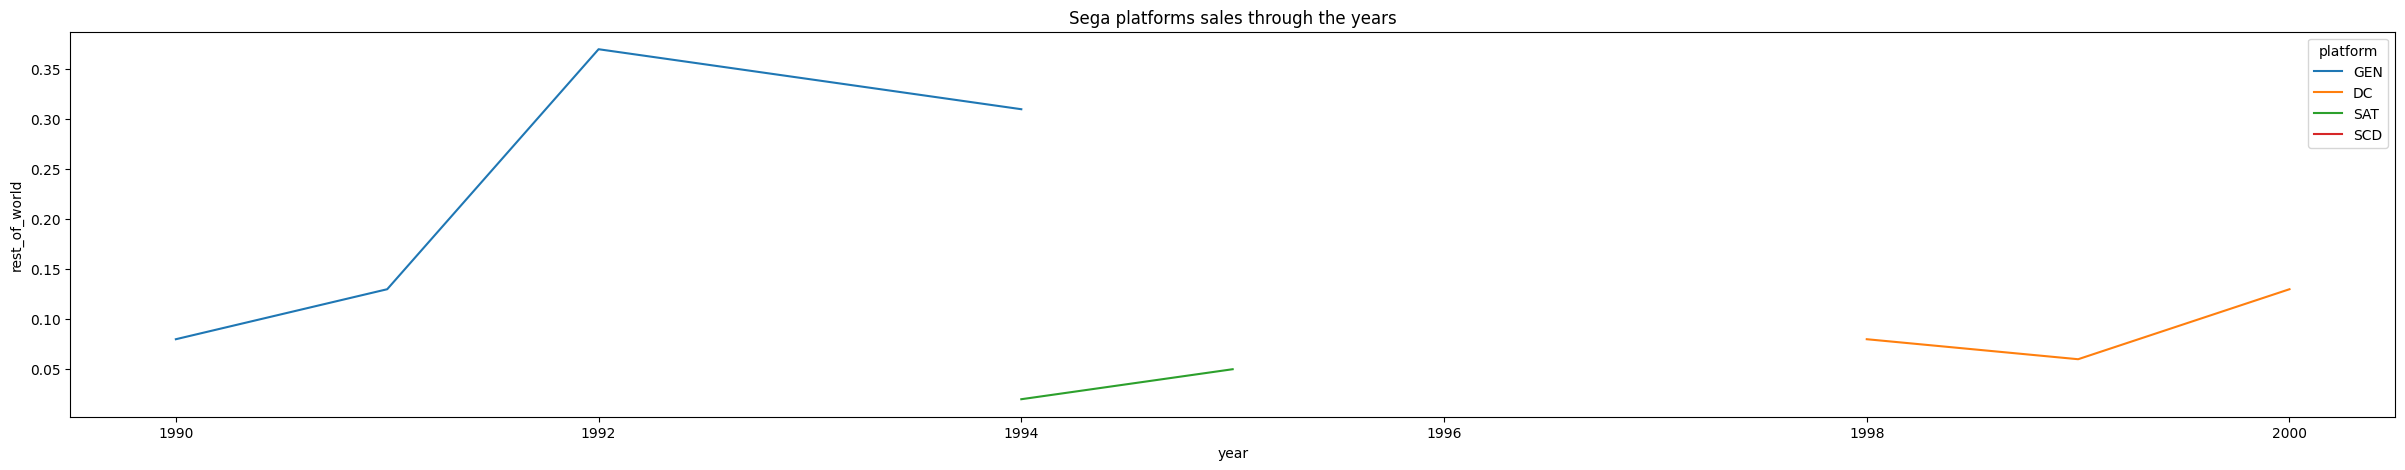

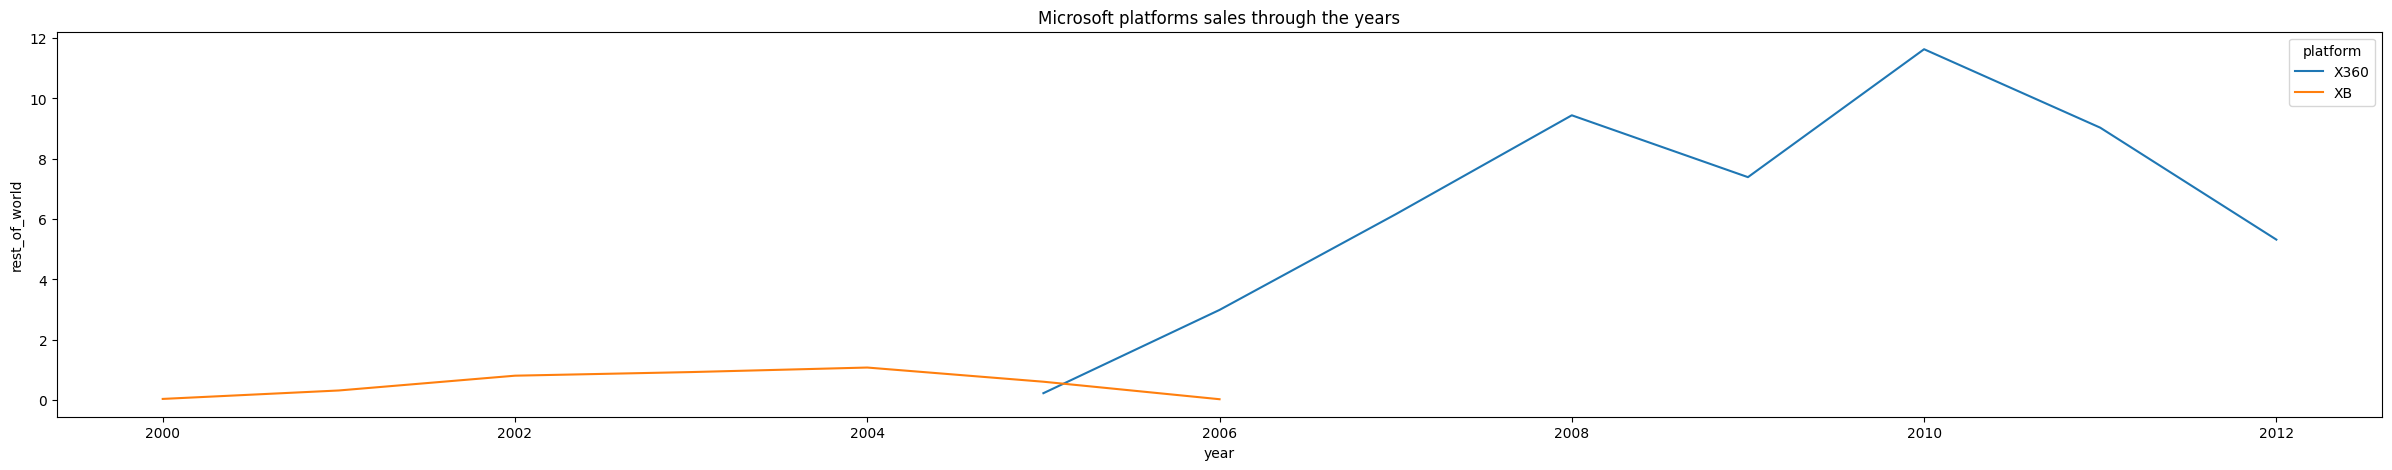

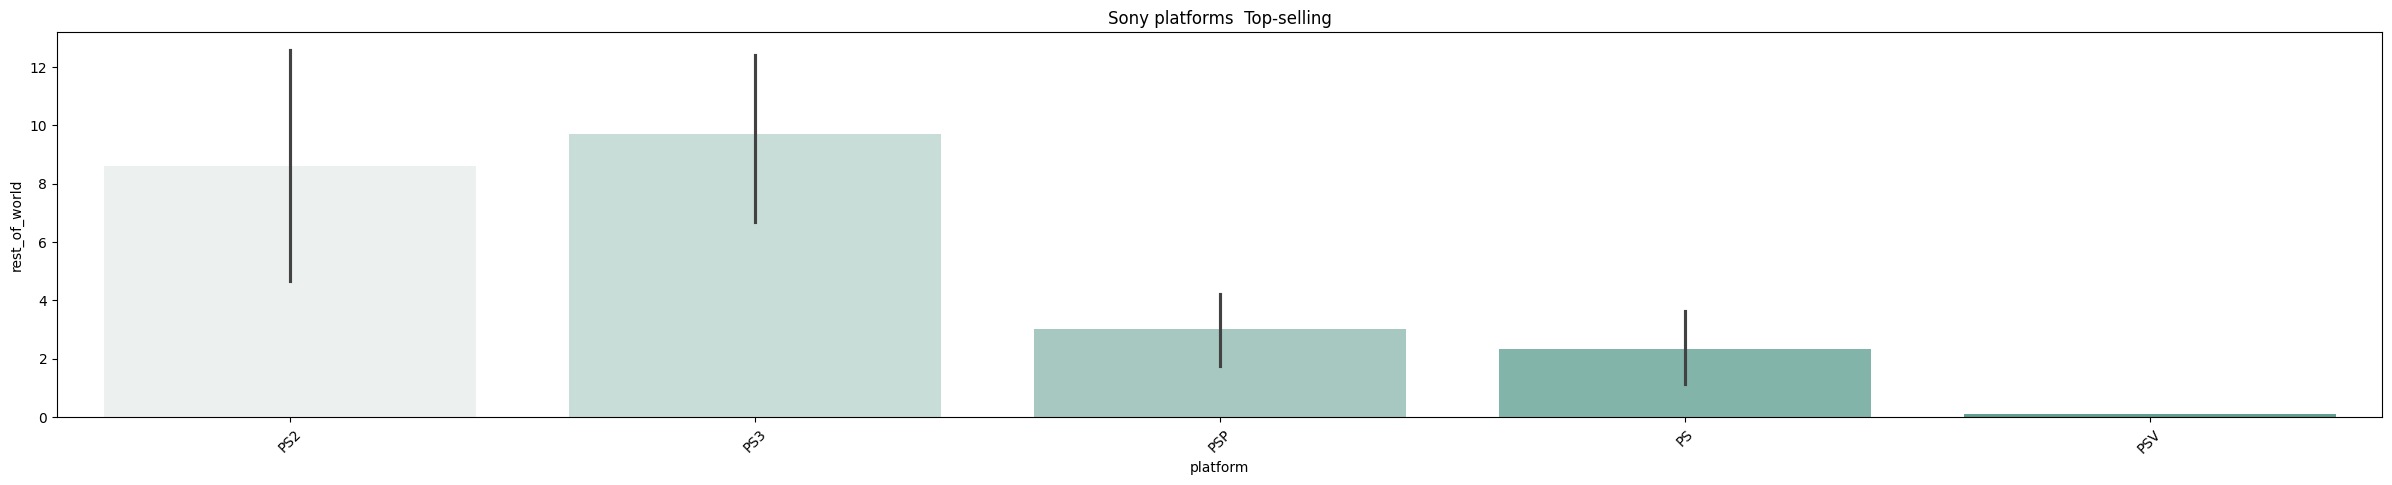

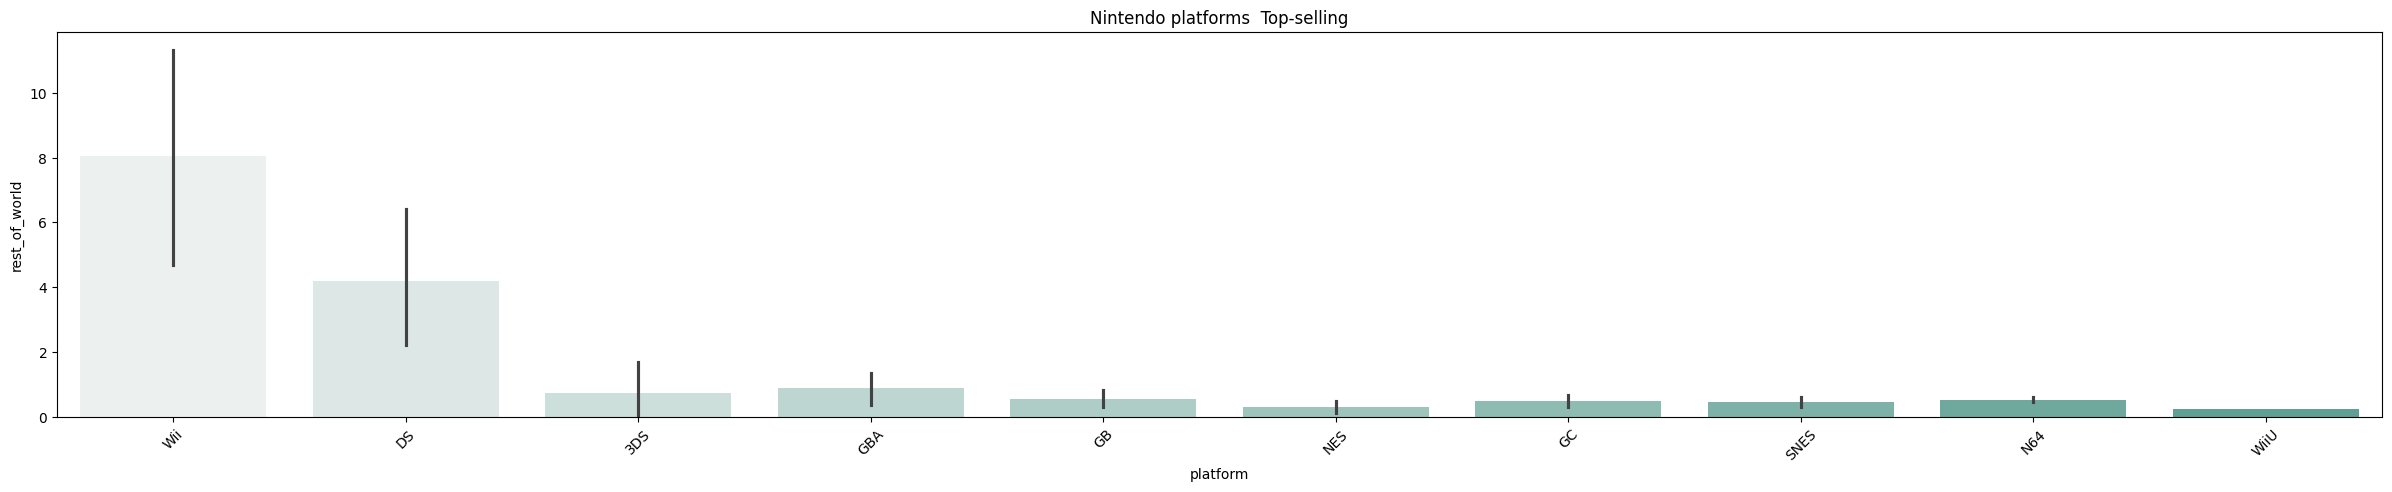

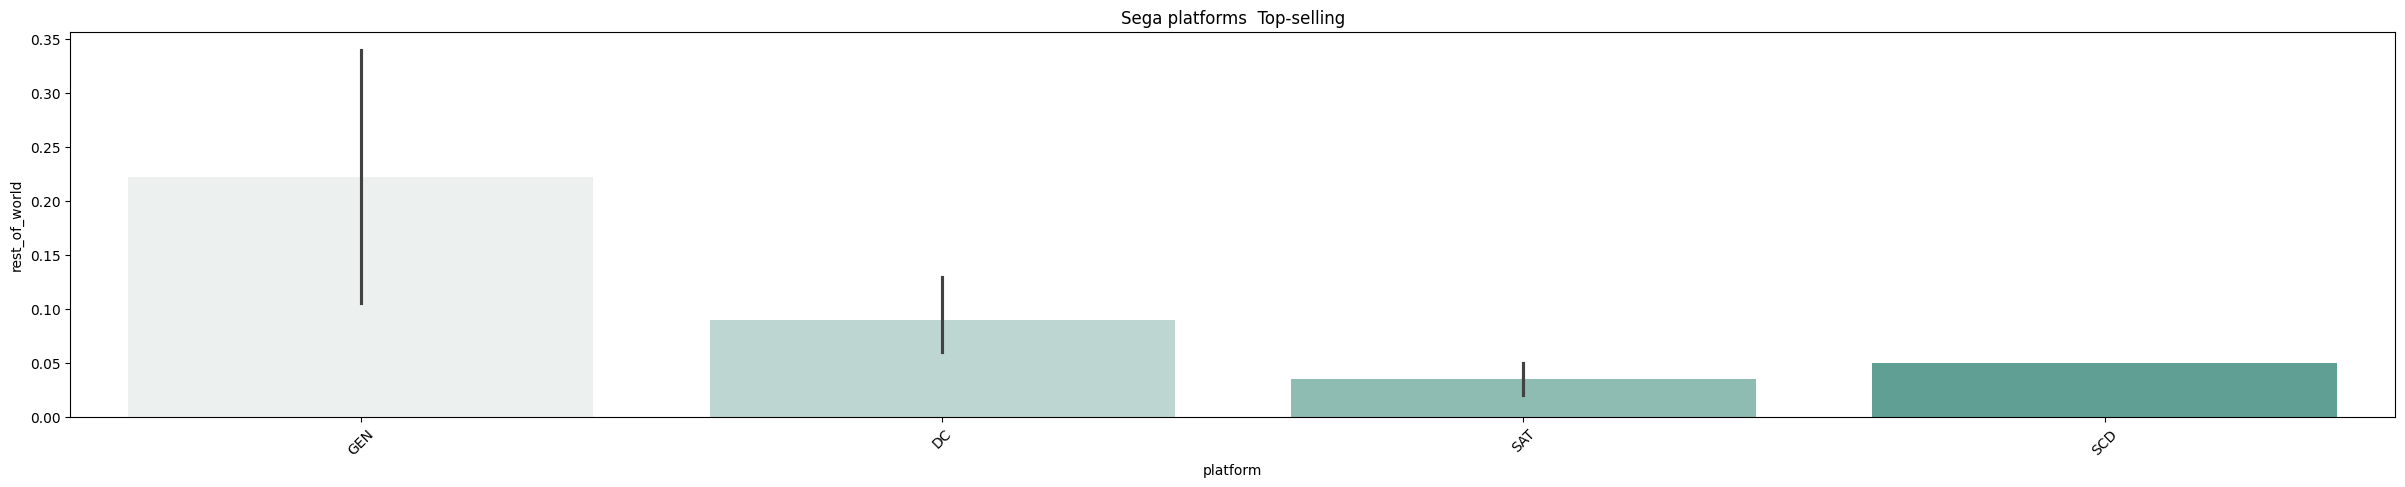

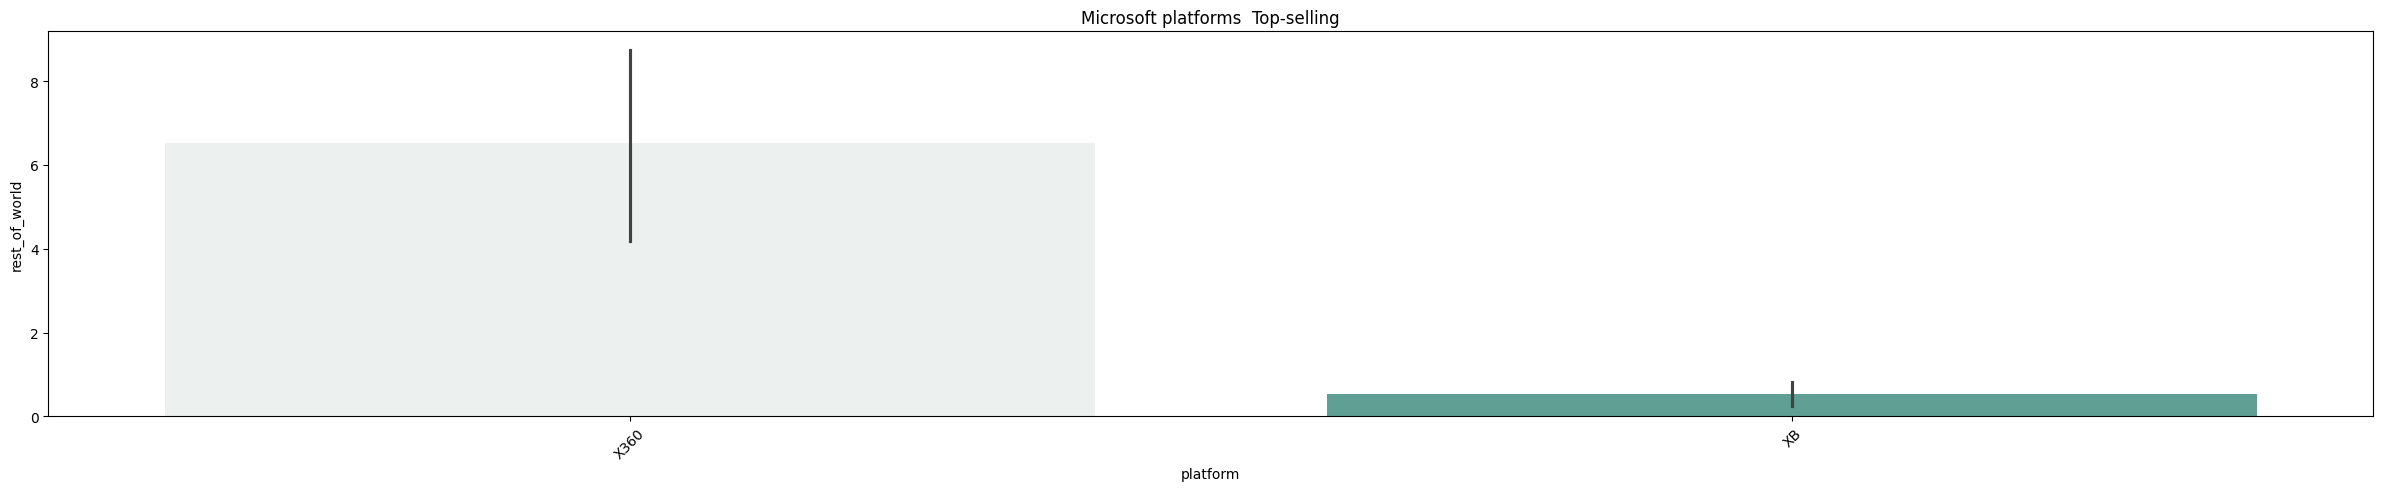

In [8]:
rest_of_world_platform_list = [sony_platform_df, nintendo_platform_df, sega_platforms_df, microsoft_platforms_df]
rest_of_world_platform_names = ['Sony platforms', 'Nintendo platforms', 'Sega platforms', 'Microsoft platforms']

fc.lineplot(rest_of_world_platform_list, rest_of_world_platform_names, objective = 'platform', y = 'rest_of_world')
fc.barplot(rest_of_world_platform_list, rest_of_world_platform_names, objective = 'platform', y = 'rest_of_world')

In [9]:
rest_world_df_platform_sales['rest_of_world'].describe().round(3)

count    148.000
mean       2.660
std        4.116
min        0.000
25%        0.180
50%        0.660
75%        2.848
max       18.400
Name: rest_of_world, dtype: float64

## Rest of the World Genre Analysis

In [10]:
rest_world_df_genre_sales['genre'].unique()

array(['Sports', 'Shooter', 'Action', 'Misc', 'Racing', 'Platform',
       'Simulation', 'Adventure', 'Role-Playing', 'Fighting', 'Puzzle',
       'Strategy'], dtype=object)

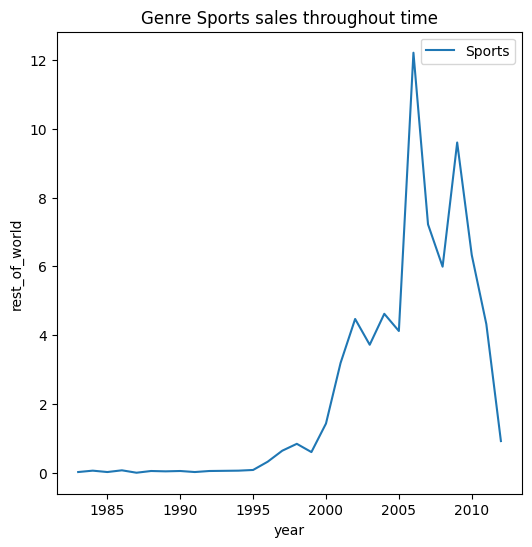

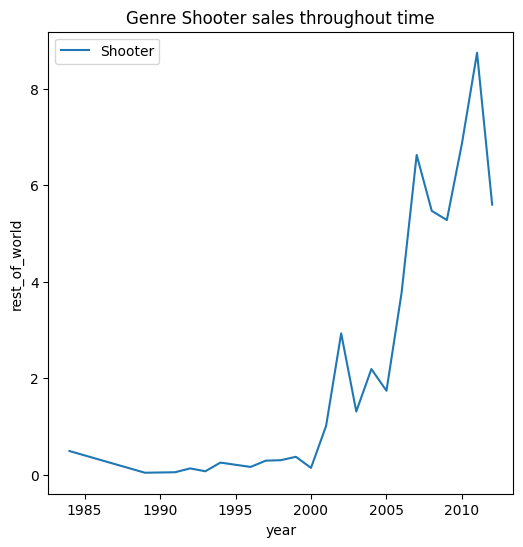

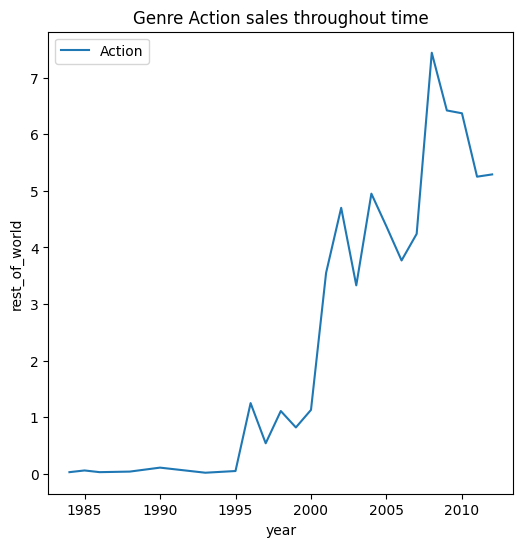

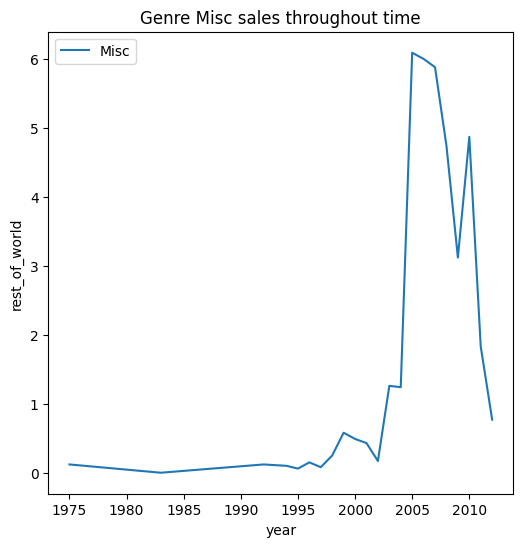

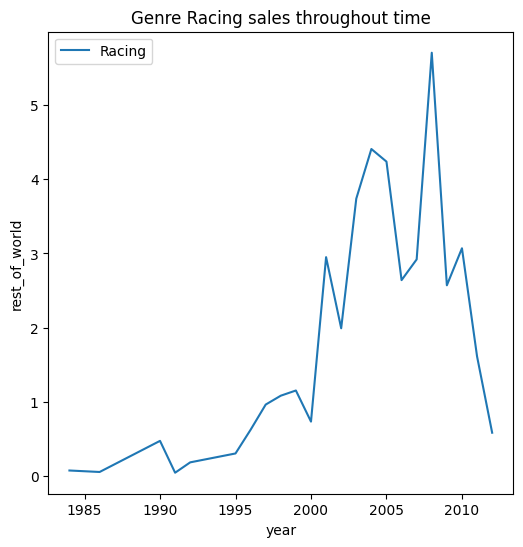

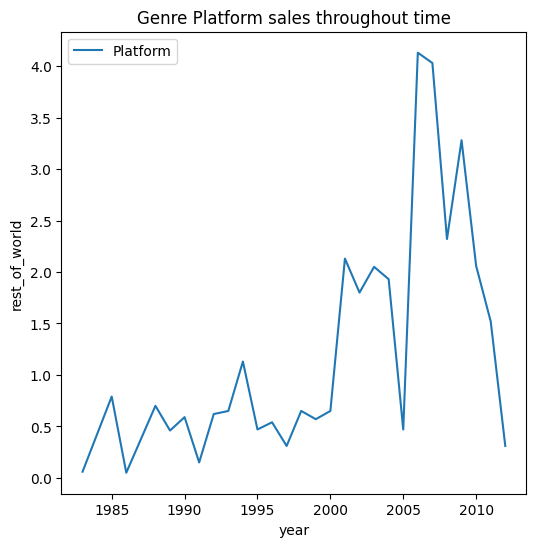

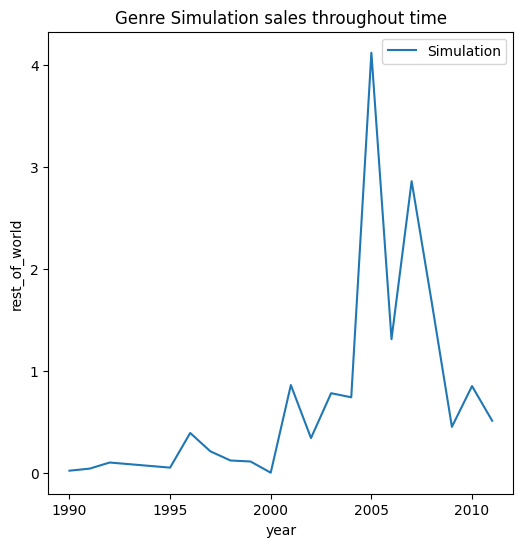

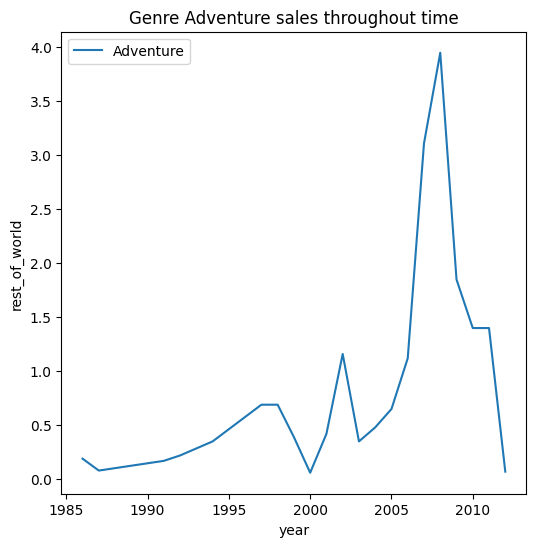

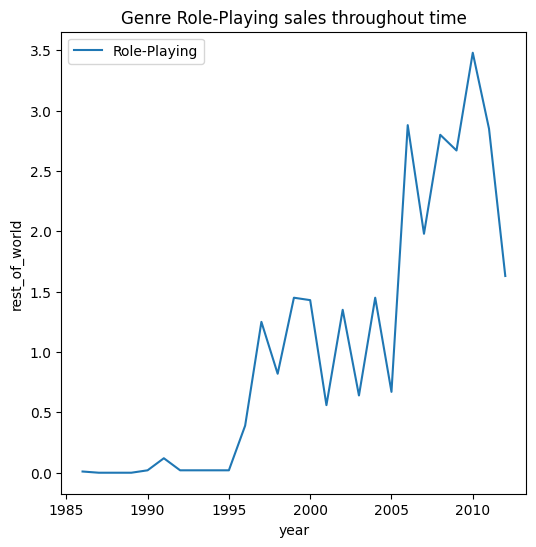

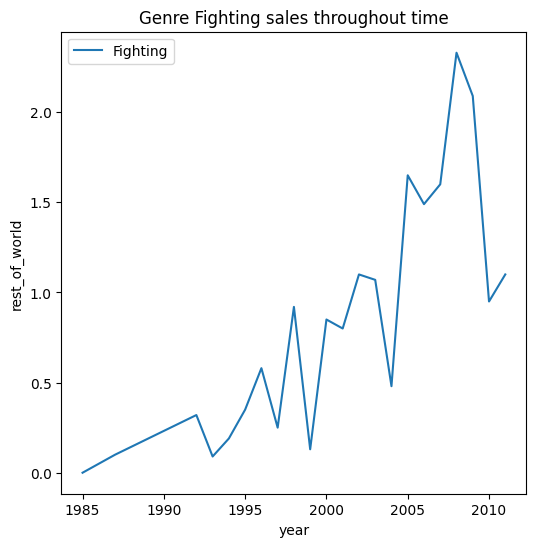

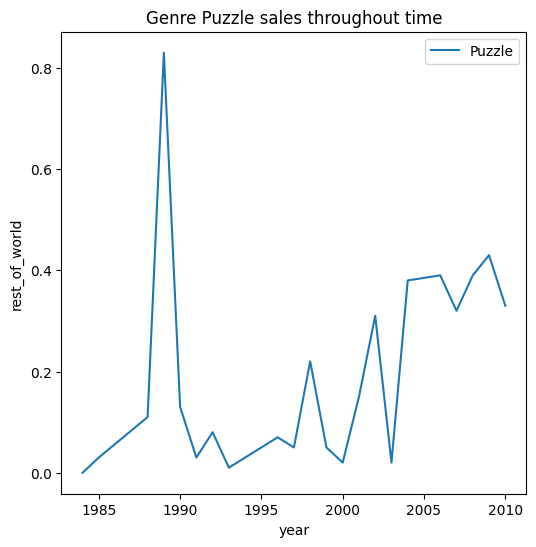

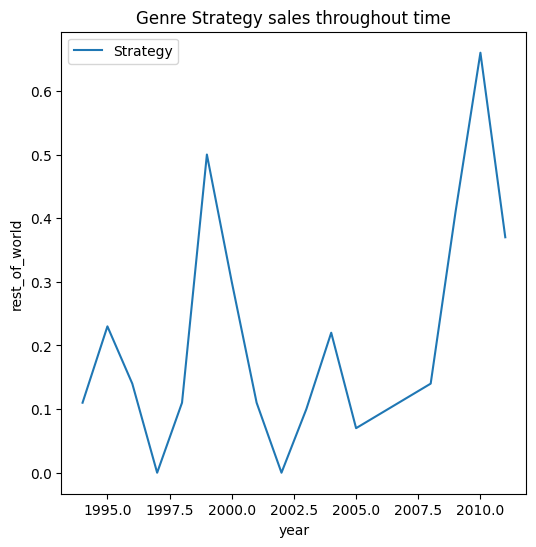

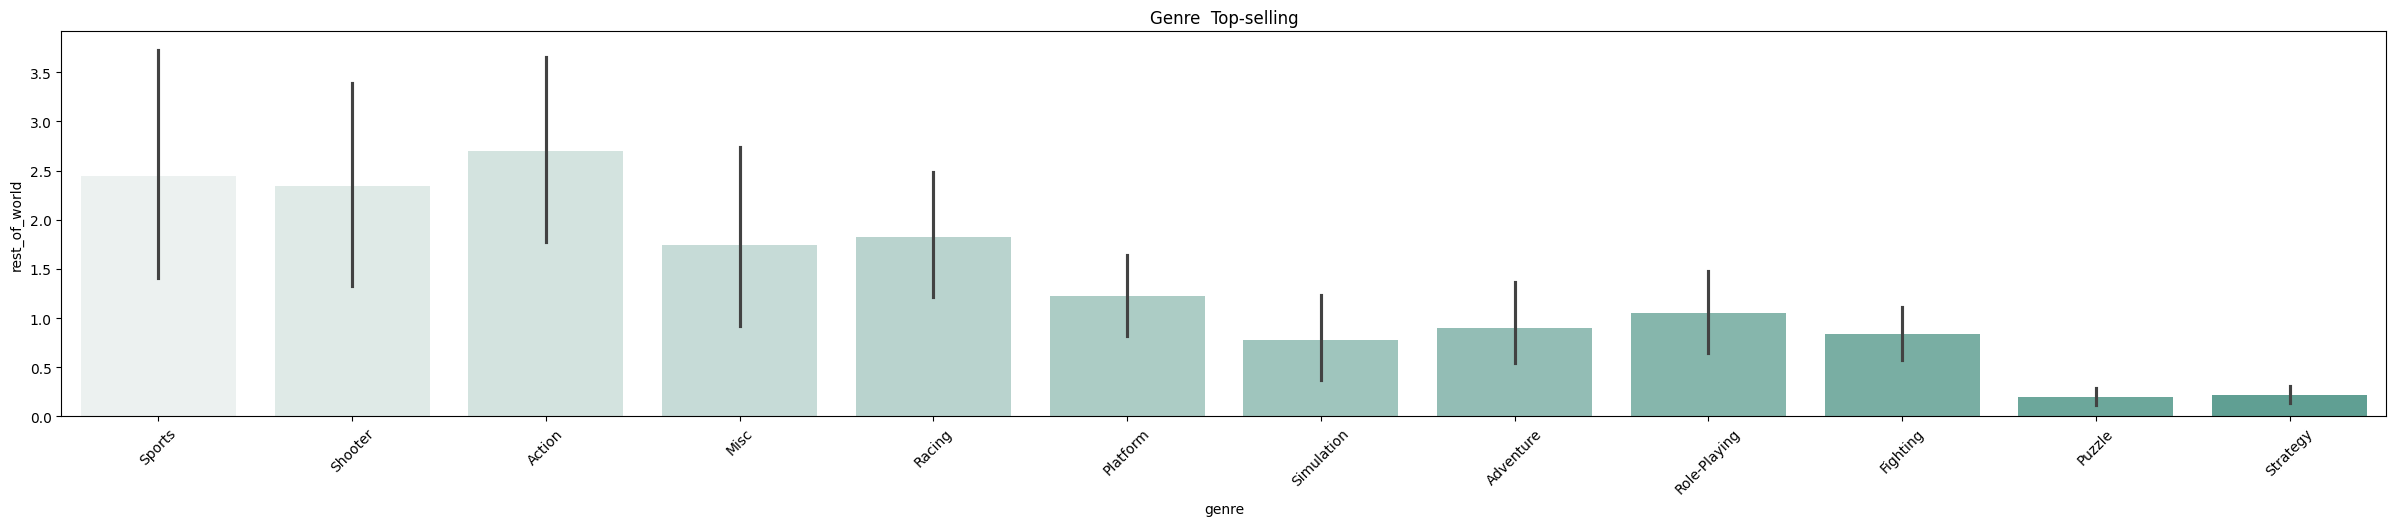

In [11]:
for genre in rest_world_df_genre_sales['genre'].unique():
    plt.figure(figsize=(6, 6))
    sns.lineplot(data = rest_world_df_genre_sales[rest_world_df_genre_sales['genre'] == genre], x = 'year', y = 'rest_of_world', label=genre)
    plt.title(f'Genre {genre} sales throughout time')
    plt.show()

fc.barplot([rest_world_df_genre_sales], ['Genre'], objective = 'genre', y = 'rest_of_world')

In [12]:
rest_world_df_genre_sales['rest_of_world'].describe().round(3)

count    277.000
mean       1.421
std        1.969
min        0.000
25%        0.110
50%        0.570
75%        1.830
max       12.210
Name: rest_of_world, dtype: float64

## Rest of the World Publisher Analysis

In [13]:
major_publisher_df = rest_world_df_publisher_sales.copy()
major_publisher_df = major_publisher_df[major_publisher_df['publisher'].isin(['Nintendo', 'Electronic Arts', 'Activision', 'Microsoft Game Studios', 'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'Konami Digital Entertainment', 'Bethesda Softworks', 'THQ', 'Sega', 'Capcom', 'Square Enix', 'Namco Bandai Games', 'Warner Bros. Interactive Entertainment'])]


indie_publisher_df = rest_world_df_publisher_sales.copy()
indie_publisher_df = indie_publisher_df[indie_publisher_df['publisher'].isin(['505 Games', 'Deep Silver', 'Level 5', 'D3Publisher', 'Global Star', 'Hudson Soft', 'Majesco Entertainment', 'Crave Entertainment', 'Valve Software', 'City Interactive', 'Sammy Corporation', 'Koch Media', 'Play It', 'GSP', 'Russel', 'Success', 'Tomy Corporation'])]

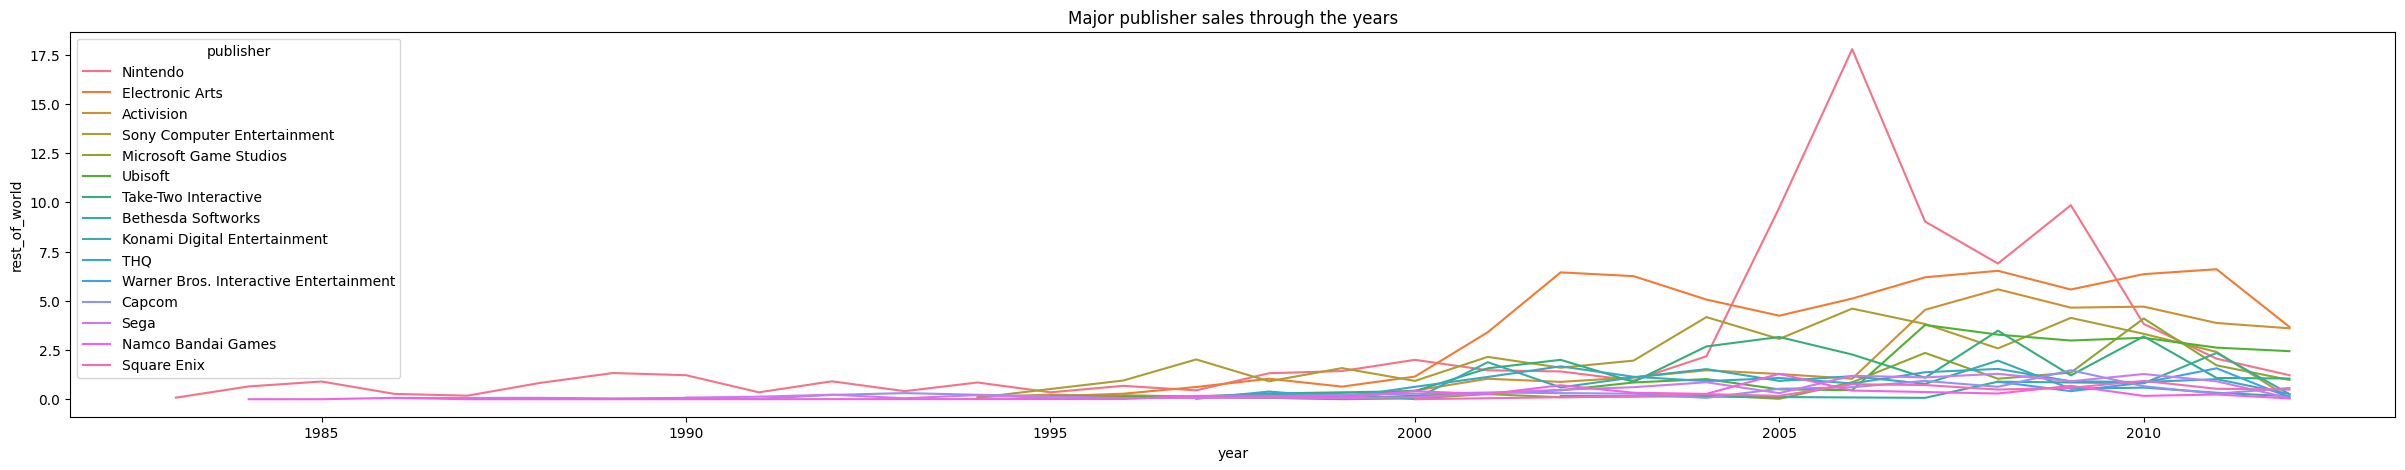

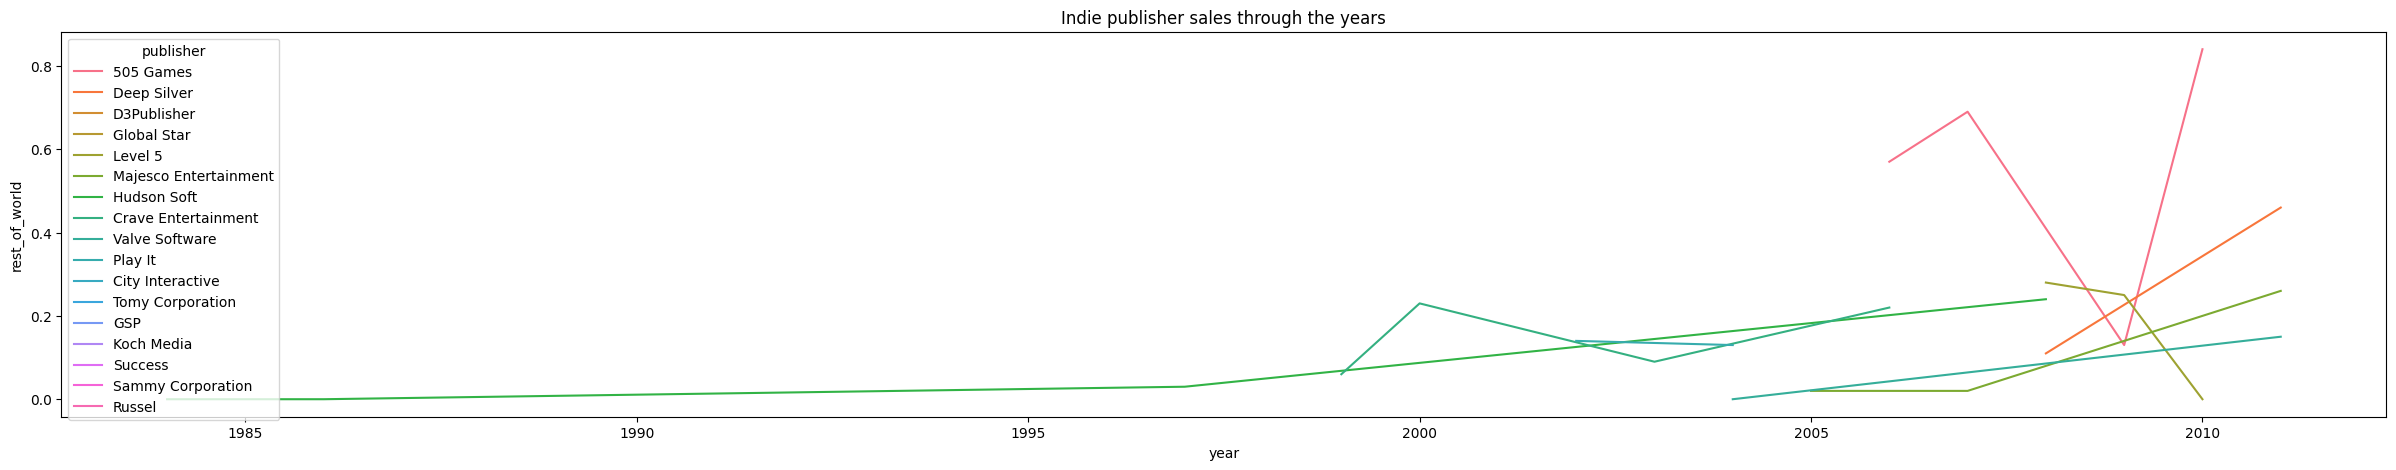

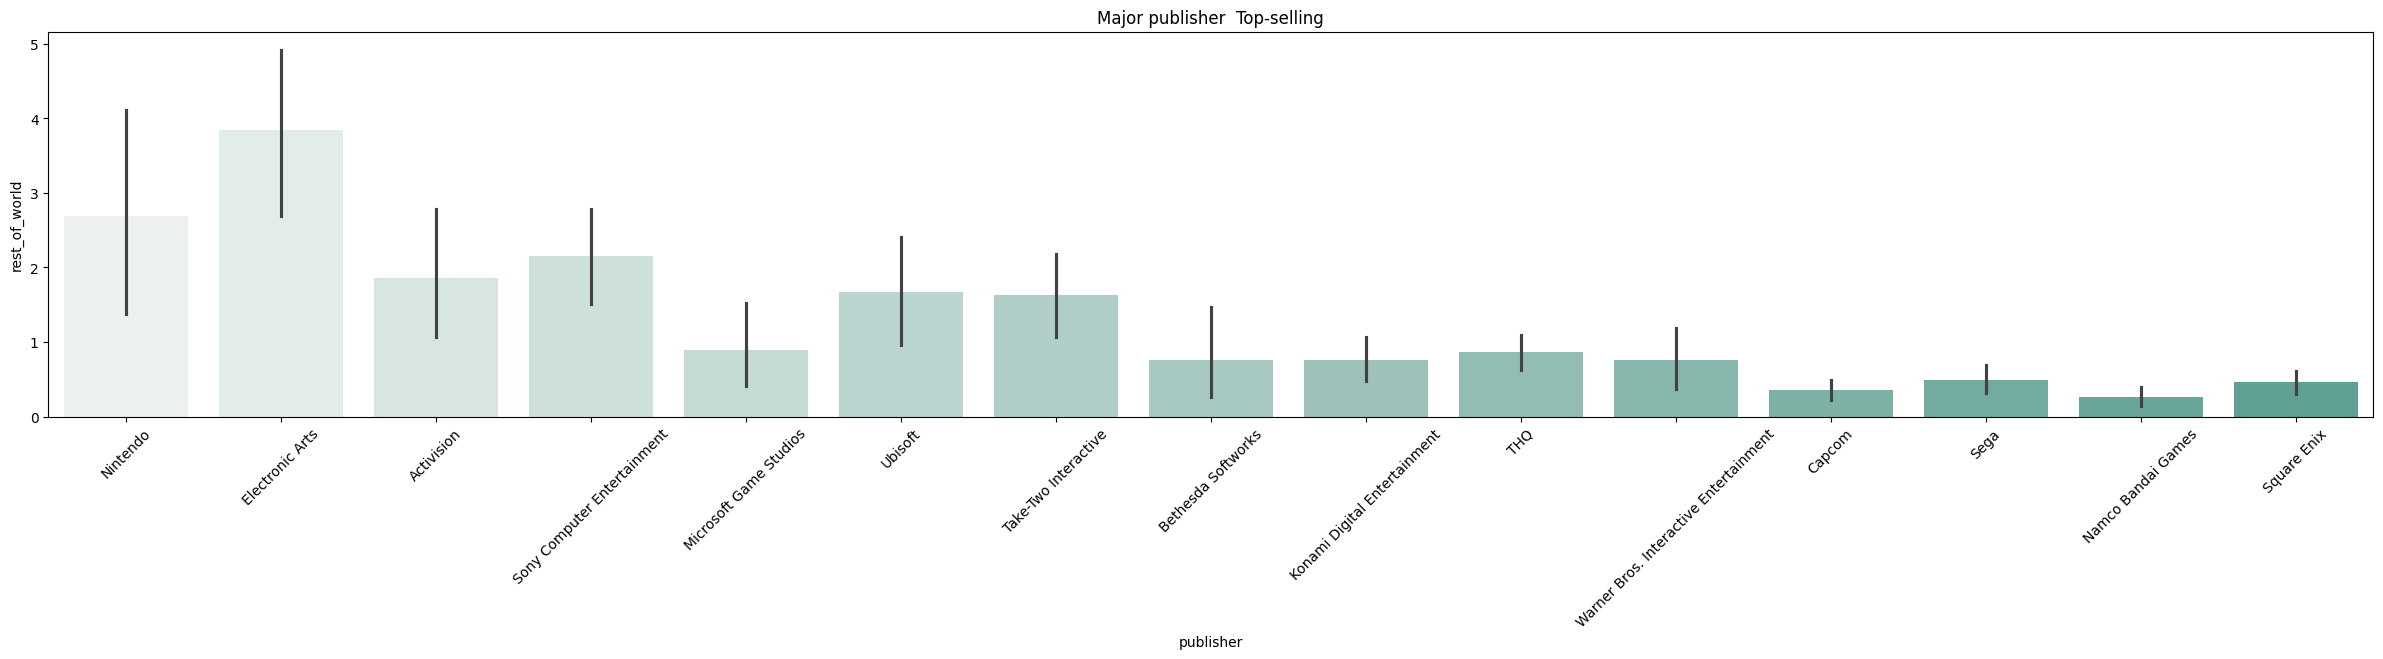

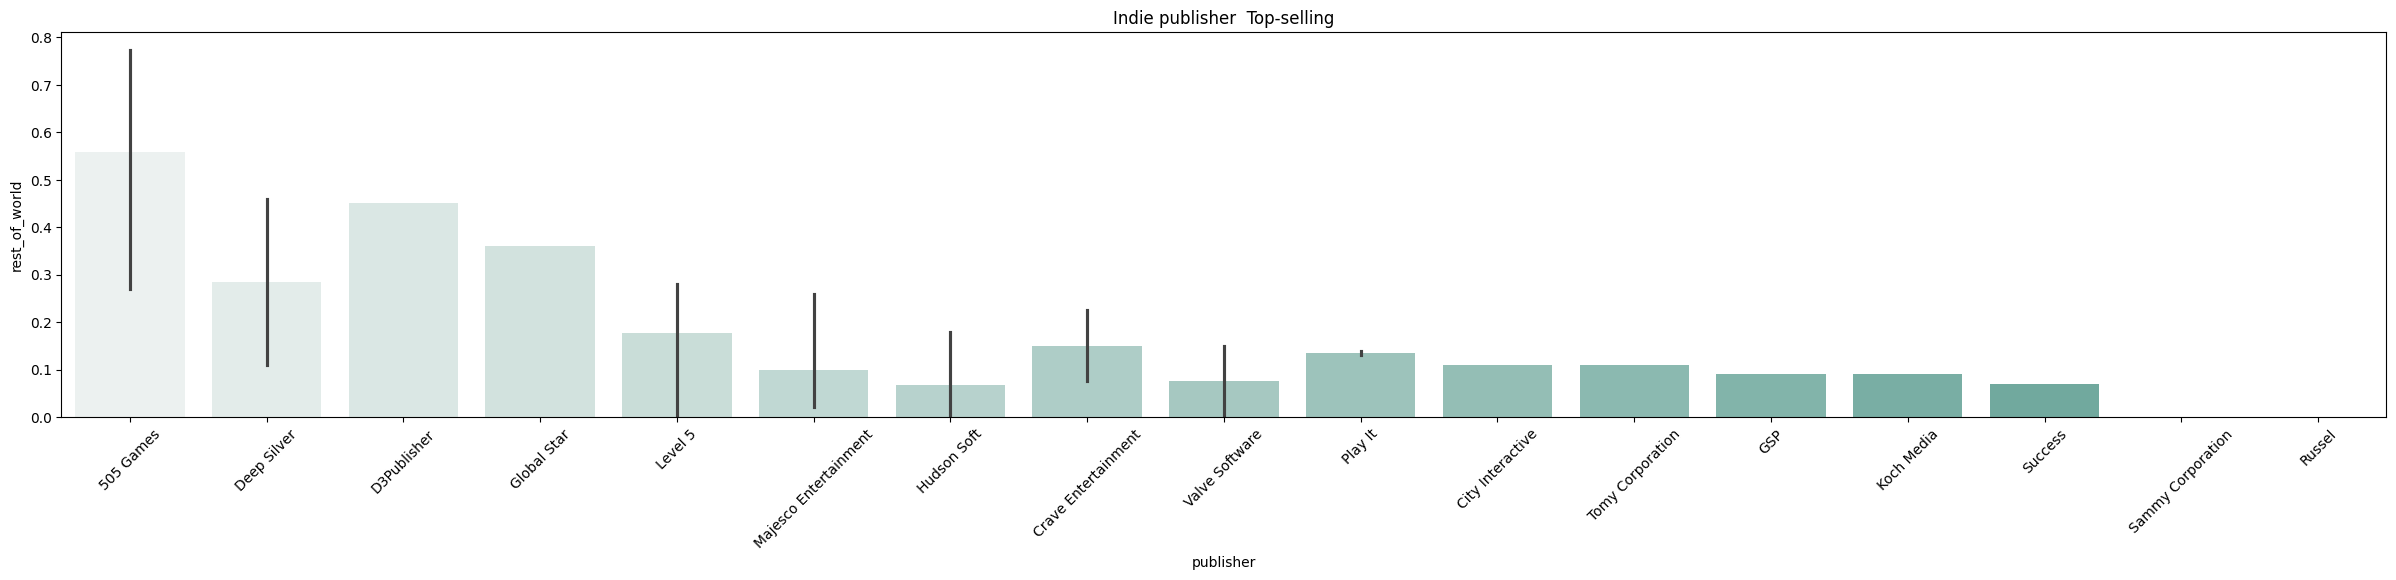

In [14]:
publisher_df_list = [major_publisher_df, indie_publisher_df]
publisher_names = ['Major publisher', 'Indie publisher']

fc.lineplot(publisher_df_list, publisher_names, objective = 'publisher', y = 'rest_of_world')
fc.barplot(publisher_df_list, publisher_names, objective = 'publisher', y = 'rest_of_world')

In [15]:
rest_world_df_publisher_sales['rest_of_world'].describe().round(3)

count    458.000
mean       0.860
std        1.625
min        0.000
25%        0.090
50%        0.260
75%        0.898
max       17.770
Name: rest_of_world, dtype: float64